# Data Visualization

In this file, we perform several data visualizations to understand the features of dataset and patterns in detail. This involves loading the datasets and utilizing libraries like matplotlib and seaborn to perform charts.

In [1]:
import numpy as np
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import ast
import seaborn as sns

In [2]:
# Load the dataset
import pandas as pd

# Load the dataset
df = pd.read_csv('MoviesData.csv')

# Show the first few rows to get an overview of the dataset
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


## Genre Analysis

This code analyzes movie genres by extracting, transforming, and visualizing their **frequency** and **average revenue**. First, the `parse_genres` function processes the **genres column**, which is stored as a string representation of a list of dictionaries. Using `ast.literal_eval()`, it safely converts the string into a Python list and extracts genre names. The parsed genres are stored in a new column, `parsed_genres`. To analyze the **popularity of different genres**, the dataset is **exploded**, ensuring that each genre appears as a separate row, making it easier to count occurrences. The **first visualization** is a bar plot showing the **top 10 most common genres**, using Seaborn to create an appealing chart.  

Next, the code evaluates the **financial performance of genres** by calculating the **average revenue** for each genre. The dataset is exploded again, so that revenue contributions can be grouped by individual genres. The **top 10 genres with the highest average revenue** are then visualized using another bar plot. This analysis helps in understanding which genres dominate the industry in terms of **popularity** and **profitability**, providing insights for producers, distributors, and movie enthusiasts alike.

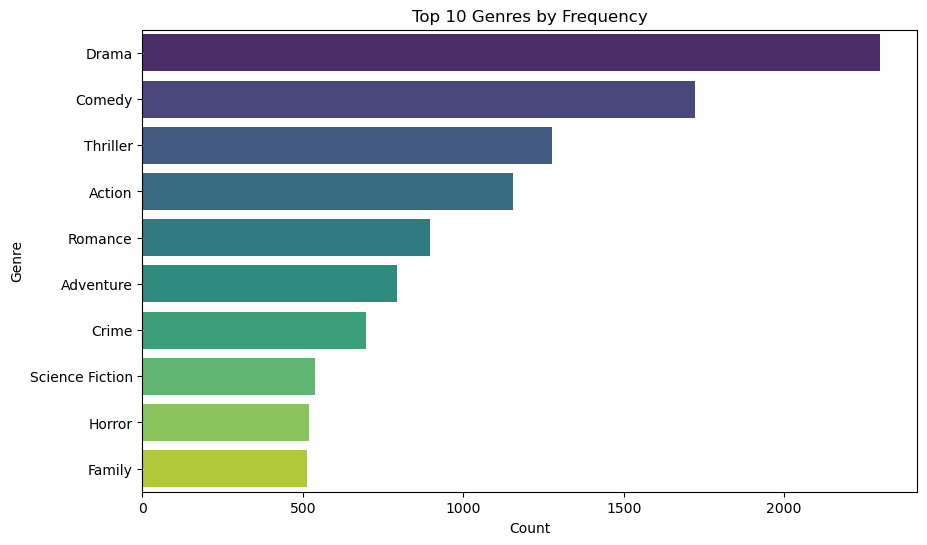

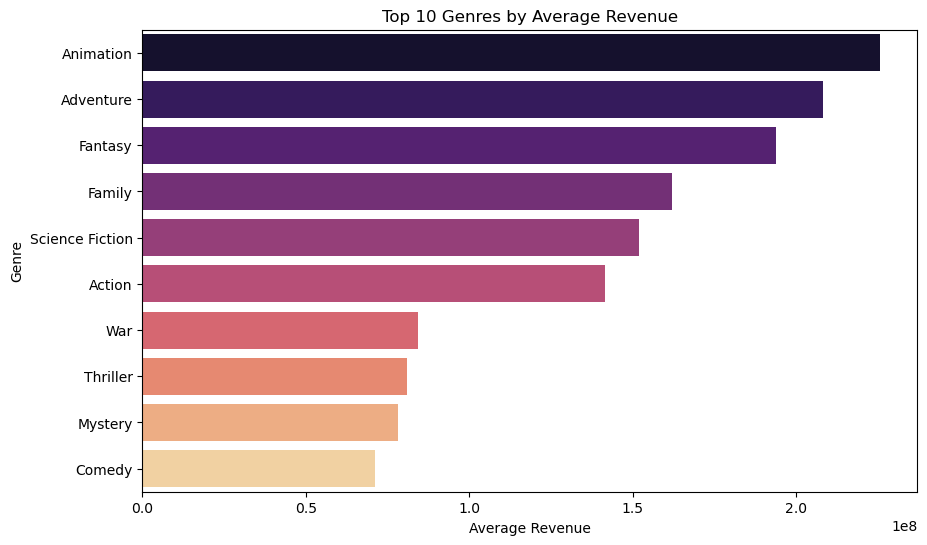

In [3]:
# Parse the genres column
def parse_genres(genre_str):
    try:
        genres = ast.literal_eval(genre_str)
        return [genre['name'] for genre in genres]
    except Exception:
        return []

df['parsed_genres'] = df['genres'].apply(parse_genres)

# Explode the list so each genre becomes a row for frequency counts
genre_series = df['parsed_genres'].explode()

# Plot 1: Genre Frequency (Top 10)
plt.figure(figsize=(10, 6))
top_genres = genre_series.value_counts().head(10)
sns.barplot(x=top_genres.values, y=top_genres.index, palette="viridis")
plt.xlabel('Count')
plt.ylabel('Genre')
plt.title('Top 10 Genres by Frequency')
plt.show()

# Plot 2: Average Revenue by Genre (Top 10)
# Explode genres for grouping
genre_revenue = df.explode('parsed_genres').groupby('parsed_genres')['revenue'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
top_genre_revenue = genre_revenue.head(10)
sns.barplot(x=top_genre_revenue.values, y=top_genre_revenue.index, palette="magma")
plt.xlabel('Average Revenue')
plt.ylabel('Genre')
plt.title('Top 10 Genres by Average Revenue')
plt.show()

## Cast Analysis

This code analyzes the **top actors in the dataset** based on their **frequency of appearances** and **average revenue per movie**. The `parse_cast` function processes the **cast column**, which is stored as a string representation of a list of dictionaries. Using `ast.literal_eval()`, it converts the string into a Python list and extracts the **top three actors** for each movie, ensuring that only key cast members are considered. The transformed data is stored in a new column, `parsed_cast`. To analyze **actor popularity**, the dataset is **exploded**, allowing each actor to be counted individually. The **first visualization** presents the **top 10 most frequently appearing actors**, using Seaborn to create a bar plot.  

To understand the **financial influence of actors**, the dataset is exploded again, and the **average revenue per actor** is computed. This step highlights which actors are associated with the highest-grossing movies. The **second visualization** presents the **top 10 actors ranked by average revenue per movie**, helping identify financially successful stars. This analysis provides valuable insights into **casting trends, actor marketability, and their impact on box office earnings**.

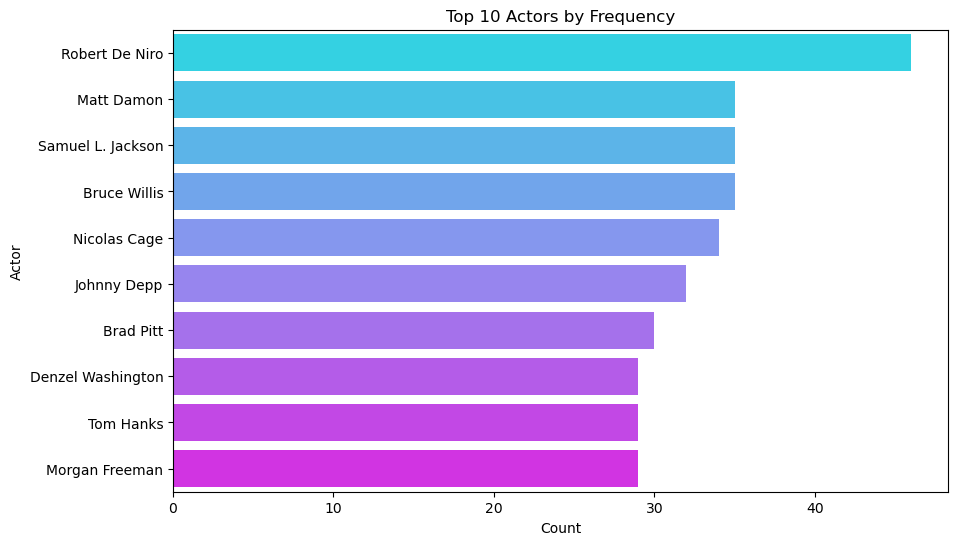

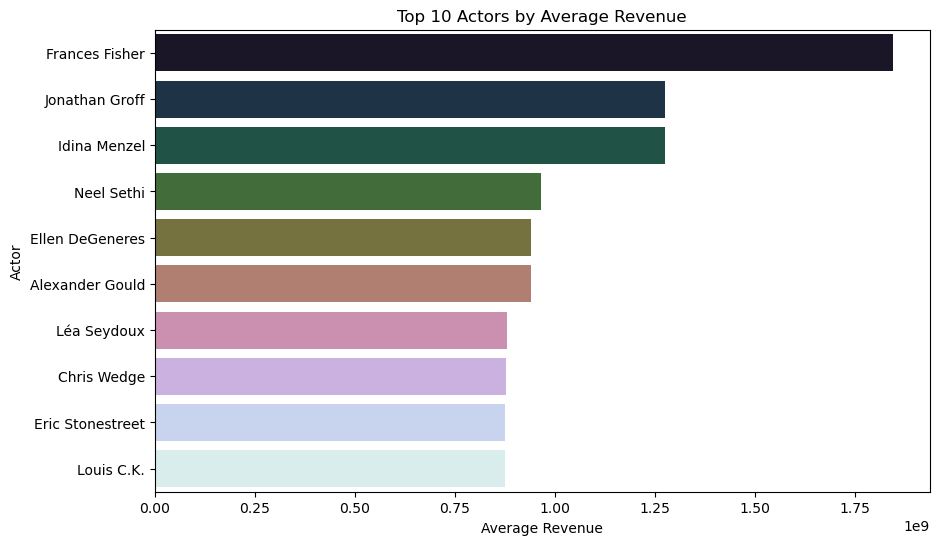

In [4]:
# Parse the cast column
def parse_cast(cast_str):
    try:
        cast_list = ast.literal_eval(cast_str)
        # Return the first 3 names to limit to main cast members
        return [c['name'] for c in cast_list[:3]]
    except Exception:
        return []

df['parsed_cast'] = df['cast'].apply(parse_cast)

# Explode cast to count frequency
actor_series = df['parsed_cast'].explode()

# Plot 1: Top 10 Actors by Frequency
plt.figure(figsize=(10, 6))
top_actors = actor_series.value_counts().head(10)
sns.barplot(x=top_actors.values, y=top_actors.index, palette="cool")
plt.xlabel('Count')
plt.ylabel('Actor')
plt.title('Top 10 Actors by Frequency')
plt.show()

# Plot 2: Average Revenue by Actor (for top actors)
actor_revenue = df.explode('parsed_cast').groupby('parsed_cast')['revenue'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
top_actor_revenue = actor_revenue.head(10)
sns.barplot(x=top_actor_revenue.values, y=top_actor_revenue.index, palette="cubehelix")
plt.xlabel('Average Revenue')
plt.ylabel('Actor')
plt.title('Top 10 Actors by Average Revenue')
plt.show()

## Crew Analysis - Top Directors

This code focuses on analyzing the **directors** in the dataset, highlighting their **frequency of involvement** and **average revenue per movie**. The `get_director` function processes the `crew` column, which contains a string representation of a list of crew members, and extracts the **director's name** based on the job role. If the job is labeled as 'Director', it retrieves the director’s name; otherwise, it returns `None`. The extracted director names are stored in a new column, `director`. To visualize **director popularity**, the first plot shows the **top 10 directors** based on how many movies they have directed, using a bar chart to represent the count of movies for each director.  

In the second analysis, the dataset is grouped by director, and the **average revenue per movie** for each director is calculated. The second plot showcases the **top 10 directors ranked by average movie revenue**, helping identify directors whose films tend to generate the most revenue. This analysis offers valuable insights into **director trends** and their influence on a movie's financial success.

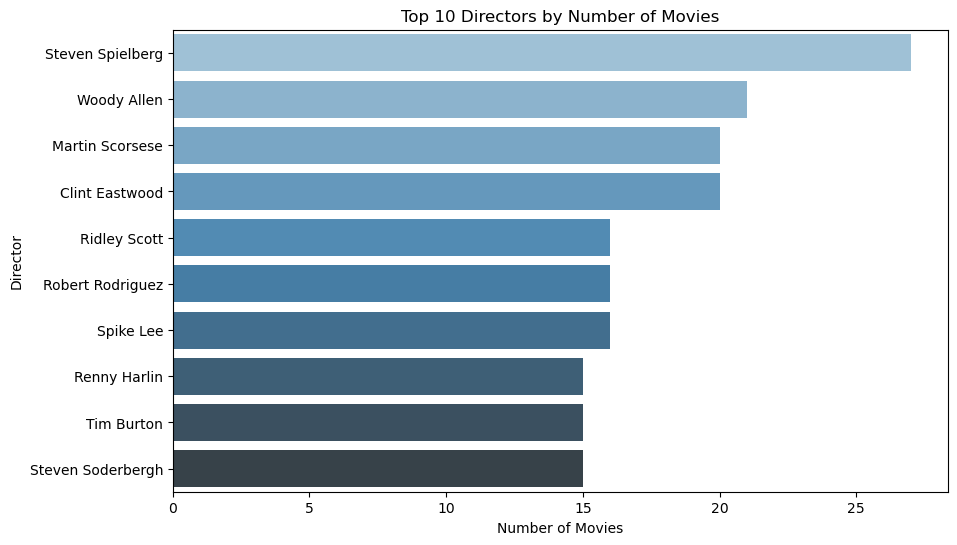

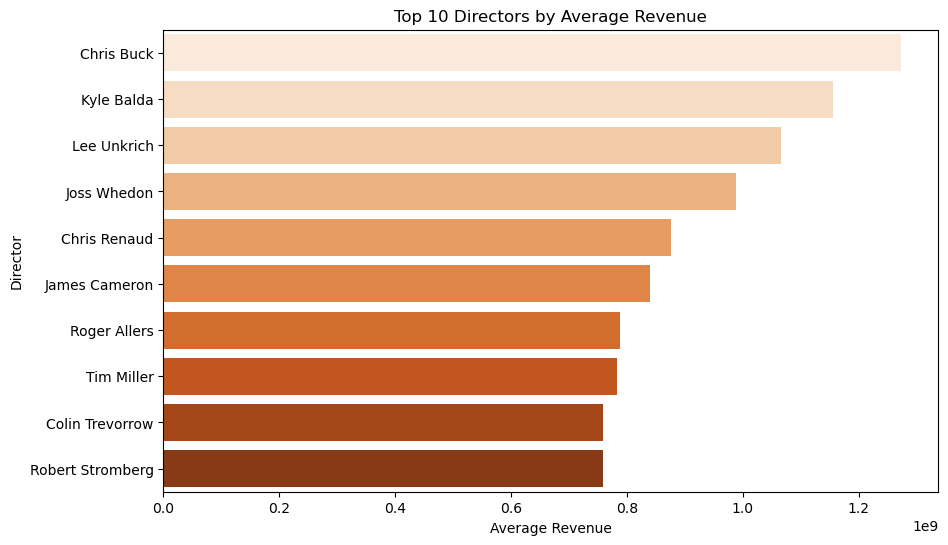

In [5]:
# Function to extract director from the crew column
def get_director(crew_str):
    try:
        crew_list = ast.literal_eval(crew_str)
        for member in crew_list:
            if member['job'] == 'Director':
                return member['name']
        return None
    except Exception:
        return None

df['director'] = df['crew'].apply(get_director)

# Plot 1: Top 10 Directors by Frequency
plt.figure(figsize=(10, 6))
director_counts = df['director'].value_counts().head(10)
sns.barplot(x=director_counts.values, y=director_counts.index, palette="Blues_d")
plt.xlabel('Number of Movies')
plt.ylabel('Director')
plt.title('Top 10 Directors by Number of Movies')
plt.show()

# Plot 2: Average Revenue by Director (Top 10 by revenue)
director_revenue = df.groupby('director')['revenue'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
top_director_revenue = director_revenue.head(10)
sns.barplot(x=top_director_revenue.values, y=top_director_revenue.index, palette="Oranges")
plt.xlabel('Average Revenue')
plt.ylabel('Director')
plt.title('Top 10 Directors by Average Revenue')
plt.show()

## Keywords Analysis

This code performs an analysis on the **keywords** column of the dataset, aiming to identify the most frequent and popular keywords associated with movies. The `parse_keywords` function processes each entry in the `keywords` column, which contains a string representation of a list of keywords, and converts it into a list of keyword names. It handles errors gracefully by returning an empty list if parsing fails. The parsed keywords are stored in a new column, `parsed_keywords`. In the first plot, the **top 20 most frequent keywords** are displayed, helping identify the most common themes or concepts across the movies in the dataset. This is done by exploding the parsed list of keywords into individual rows, counting their occurrences, and visualizing them with a bar chart.  

The second plot focuses on the **average popularity** of movies for each keyword. By exploding the `parsed_keywords` list again and grouping by keyword, the average popularity is computed for each keyword, showing how popular movies with certain keywords tend to be. The top 10 keywords with the highest average popularity are then visualized, providing insight into which keywords are associated with the most popular movies. This analysis offers a valuable look into the relationship between movie keywords and both their frequency of occurrence and their popularity.

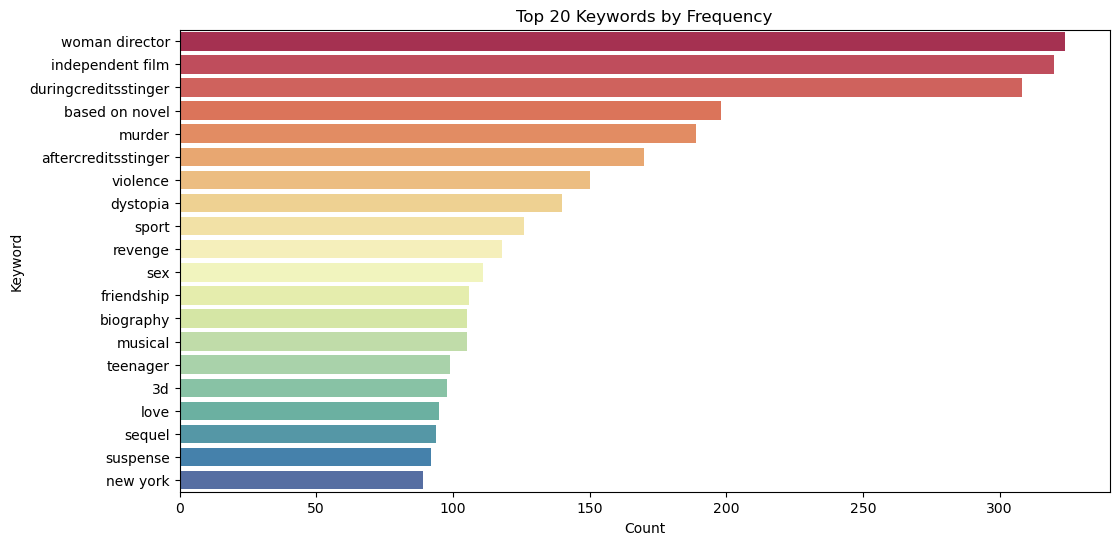

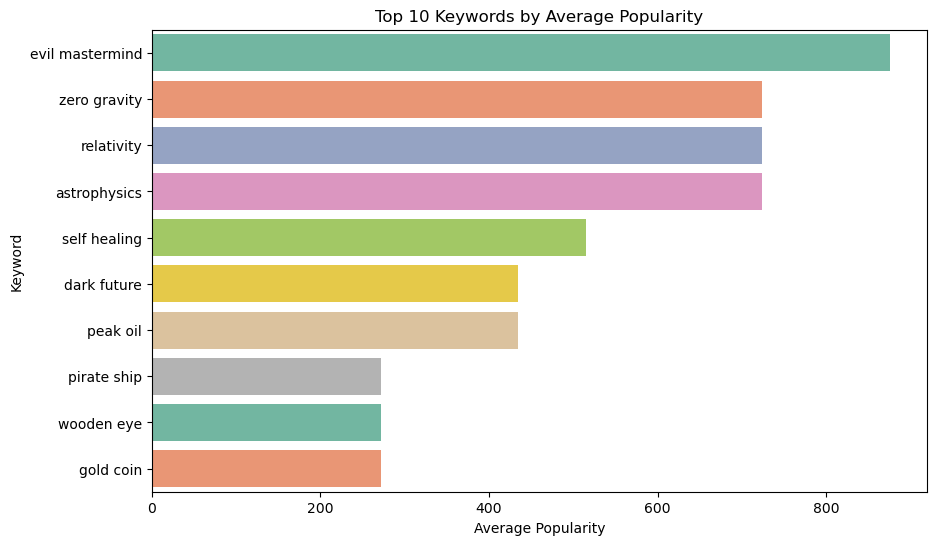

In [6]:
# Parse the keywords column
def parse_keywords(keywords_str):
    try:
        keywords_list = ast.literal_eval(keywords_str)
        return [keyword['name'] for keyword in keywords_list]
    except Exception:
        return []

df['parsed_keywords'] = df['keywords'].apply(parse_keywords)

# Plot 1: Top 20 Keywords by Frequency
plt.figure(figsize=(12, 6))
keyword_series = df['parsed_keywords'].explode()
top_keywords = keyword_series.value_counts().head(20)
sns.barplot(x=top_keywords.values, y=top_keywords.index, palette="Spectral")
plt.xlabel('Count')
plt.ylabel('Keyword')
plt.title('Top 20 Keywords by Frequency')
plt.show()

# Plot 2: Average Popularity by Keyword (Top 10)
keyword_popularity = df.explode('parsed_keywords').groupby('parsed_keywords')['popularity'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
top_keyword_popularity = keyword_popularity.head(10)
sns.barplot(x=top_keyword_popularity.values, y=top_keyword_popularity.index, palette="Set2")
plt.xlabel('Average Popularity')
plt.ylabel('Keyword')
plt.title('Top 10 Keywords by Average Popularity')
plt.show()